In [2]:
from encapsulage import *
from linear import *
from module import *
from softmax import *
from tanh import *
from utils import *
from mltools import *

import numpy as np
import matplotlib.pyplot as plt
import random as rd

# Donnees non-bruitees

In [3]:
def test_linear(sigma=0.1, epsilon=0.02, nb_epochs=1000, learning_rate=1e-5):
	# Generation de donnees quelconques
	datax, datay = gen_arti(data_type=0, epsilon=epsilon, sigma=sigma)

	#  Création du réseau
	linear = Linear(datax.shape[1], datay.shape[1])
	mse = MSELoss()

	# Boucle d'apprentissage 
	# Initialisation
	list_loss=[]

	# Boucle d'apprentissage
	for epoch in range(nb_epochs):
		# Forward pass
		yhat = linear.forward(datax)
		average_loss = np.mean(mse.forward(datay, yhat))
			
		# Backward pass
		delta = mse.backward(yhat, datay)
		linear.backward_update_gradient(datax, delta)

		# Mise à jour des paramètres
		linear.update_parameters(learning_rate)
		linear.zero_grad()
		list_loss.append(average_loss)

		if epoch % 100 == 0:
			print("Epoch {}: Loss = {}".format(epoch, average_loss))

	last_loss = np.mean(mse.forward(datay, yhat)) 
	print("Erreur mse :", last_loss)
	print("Accuracy :", 1 - last_loss)

	w = linear._parameters
	print("Coefficient linéaire prédit : ", w)
	## Visualisation des données et de la frontière de décision pour un vecteur de poids w
	plt.figure()
	plt.title('Frontière de décision pour RNN Lineaire\nnb_epochs ={}, bruits = {} learning rate = {}\nAccuracy = {}'.format(nb_epochs, epsilon, learning_rate, 1 - last_loss))
	plt.xlabel('x')
	plt.ylabel('y')

	plot_frontiere(datax, lambda x : np.sign(x.dot(w)),step=100)
	plot_data(datax,datay)
	plt.figure()

	plt.title('Evolution de la loss')
	plt.plot(list_loss, label='loss', c='midnightblue')
	plt.legend()
	plt.xlabel('Nombre d\'itérations')

Epoch 0: Loss = 5.007045285857949
Epoch 100: Loss = 0.8538962914052926
Epoch 200: Loss = 0.8538962914052924
Epoch 300: Loss = 0.8538962914052924
Epoch 400: Loss = 0.8538962914052924
Epoch 500: Loss = 0.8538962914052924
Epoch 600: Loss = 0.8538962914052924
Epoch 700: Loss = 0.8538962914052924
Epoch 800: Loss = 0.8538962914052924
Epoch 900: Loss = 0.8538962914052924
Erreur mse : 0.8538962914052924
Accuracy : 0.14610370859470756
Coefficient linéaire prédit :  [[0.08664478]
 [0.05749765]]


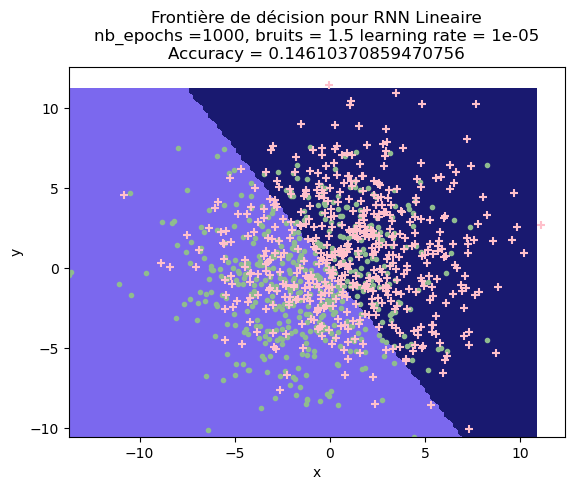

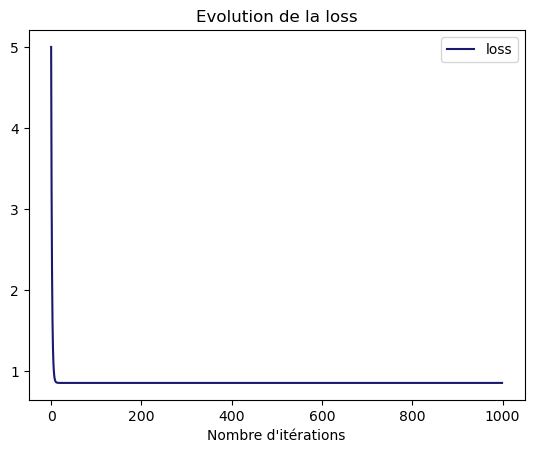

In [6]:
test_linear(sigma=10, epsilon=1.5)